##Task 1.1

Getting Github Repo : 

In [ ]:
!git clone -l -s https://github.com/PushpakBhoge512/Assignment cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 51 (delta 10), reused 38 (delta 6), pack-reused 0
Unpacking objects: 100% (51/51), done.
/content/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo
'Damage Identification'  'Data Visualization'   README.md


Importing Libraries : 

In [ ]:
import pandas as pd
import json

# For running inference on the TF-Hub module.
import tensorflow as tf

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

In [ ]:
import json
with open('/content/cloned-repo/Data Visualization/data/5.json') as data_file:    
  data = json.load(data_file)

In [ ]:
df = pd.DataFrame(data)
df.shape
df1 = df["value"]
try:
  if len(list(df1[1]))==len(list(df1[0])):
    pass
  else:
    raise Exception("NO")
except:
  df1.drop(0,inplace = True)
boxes = df1[1]["points"]
label = df1[1]["polygonlabels"]

In [ ]:
df1 = pd.DataFrame(df1)
df1 = df1["value"]

In [ ]:
df1

1     {'points': [[3.5460992907801416, 44.4794952681...
2     {'points': [[24.34988179669031, 53.31230283911...
3     {'points': [[4.0189125295508275, 46.0567823343...
4     {'points': [[3.309692671394799, 42.58675078864...
5     {'points': [[47.04491725768322, 10.09463722397...
6     {'points': [[73.28605200945628, 23.34384858044...
7     {'points': [[54.846335697399525, 68.4542586750...
8     {'points': [[94.08983451536643, 40.06309148264...
9     {'points': [[83.451536643026, 9.77917981072555...
10    {'points': [[70.92198581560284, 64.03785488958...
11    {'points': [[86.28841607565012, 47.94952681388...
12    {'points': [[75.88652482269504, 9.779179810725...
13    {'points': [[83.451536643026, 10.0946372239747...
14    {'points': [[45.62647754137116, 60.56782334384...
15    {'points': [[50.354609929078016, 9.14826498422...
16    {'points': [[93.85342789598108, 21.45110410094...
17    {'points': [[89.12529550827423, 11.67192429022...
18    {'points': [[75.41371158392435, 9.46372239

In [ ]:
len(list(df1[1]))

2

In [ ]:
s = []
for i,v in enumerate(list(df1)):
  s.append(list(df1)[i])

In [ ]:
boxes = []
names = []
for i in s:
  boxes.append(i["points"])
  names.append(i["polygonlabels"])


In [ ]:
np.min(boxes[0],axis=0)

array([ 2.36406619, 44.47949527])

In [ ]:
from PIL import Image
img = Image.open('/content/cloned-repo/Data Visualization/images/5.jpg').convert('RGBA')
img.size

(640, 480)

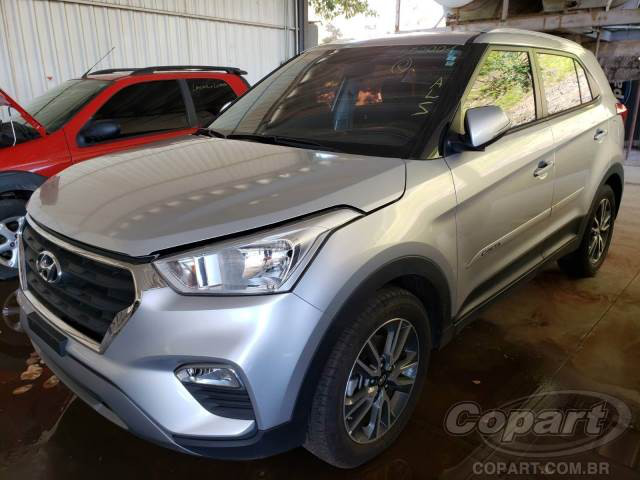

In [ ]:
img

In [ ]:
colors = ['blue', 'purple', 'red', 'green', 'orange', 'salmon', 'pink', 'gold',
                        'orchid', 'slateblue', 'limegreen', 'seagreen', 'darkgreen', 'olive',
                        'teal', 'aquamarine', 'steelblue', 'powderblue', 'dodgerblue', 'navy',
                        'magenta', 'sienna', 'maroon']

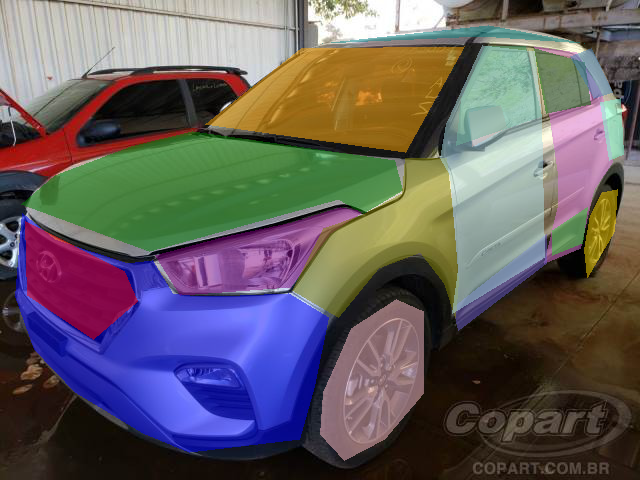

In [ ]:
for i,v in enumerate(boxes):
  dim = v
  name = names[i]
  poly = []
  for j in dim:
    poly.append(((j[0]*img.size[0])/100,(j[1]*img.size[1])/100))
  poly.append(((dim[0][0]*img.size[0])/100,(dim[0][1]*img.size[1])/100))
  img2 = img.copy()
  draw = ImageDraw.Draw(img2)
  draw.polygon(poly, fill = colors[i])
  img3 = Image.blend(img, img2, 0.5)
  img = img3
img

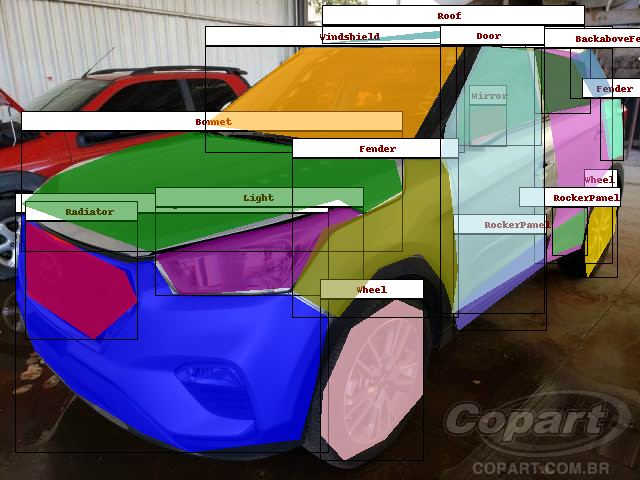

In [ ]:
for i,v in enumerate(boxes):
  dim = v
  name = names[i]
  poly = []
  for j in dim:
    poly.append(((j[0]*img.size[0])/100,(j[1]*img.size[1])/100))
  poly.append(((dim[0][0]*img.size[0])/100,(dim[0][1]*img.size[1])/100))
  img2 = img.copy()
  draw = ImageDraw.Draw(img2)
  draw.polygon(poly, fill = colors[i])
  img3 = Image.blend(img, img2, 0.5)
  #d = ImageDraw.Draw(img3)
  #d.multiline_text((np.mean(poly,axis=0)[0],np.mean(poly,axis=0)[1]), str(names[i]), fill=(0, 0,0))
  xmin = np.min(poly,axis = 0)[0]
  ymin = np.min(poly,axis = 0)[1]
  xmax = np.max(poly,axis = 0)[0]
  ymax = np.max(poly,axis = 0)[1]
  thickness = 4
  #im_width, im_height = img3.size
  #(left, right, top, bottom) = (xmin * im_width, xmax * im_width,ymin * im_height, ymax * im_height)
  #(left, right, top, bottom) = ((50,100,50,92))
  #draw.line([(left, top), (left, bottom), (right, bottom), (right, top),(left, top)],width=thickness,fill="black")
  #img1 = ImageDraw.Draw(img3)  
  #img1.line([(40, 40), (90,90),(120,120)], fill ="black", width = 0)
  #img3.show()
  img1 = ImageDraw.Draw(img3)  
  img1.rectangle([(xmin,ymin),(xmax,ymax)], outline ="black")
  #img1.rectangle([(xmin,ymin-1),(xmax,ymin-20)],fill = "white",outline ="black")
  #img1.multiline_text((np.mean(np.array([xmin,xmax])-52),ymin-15), str(names[i][0]), fill=(128, 0,0))

  #d = ImageDraw.Draw(img1)
  if xmax-xmin < 6*len(str(names[i][0])):
    img1.rectangle([(xmin-3*len(str(names[i][0])),ymin-1),(xmax+3*len(str(names[i][0])),ymin-20)],fill = "white",outline ="black")
    img1.multiline_text((np.mean(np.array([(xmin-3*len(str(names[i][0]))),(xmax+3*len(str(names[i][0])))])-15),ymin-15), str(names[i][0]), fill=(128, 0,0))
  else:
    img1.rectangle([(xmin,ymin-1),(xmax,ymin-20)],fill = "white",outline ="black")
    img1.multiline_text((np.mean(np.array([xmin,xmax])-15),ymin-15), str(names[i][0]), fill=(128, 0,0))
  #img.show()
  
  img = img3

img3.save('/tmp/out.png')
img3

##Task 1.2

In [ ]:
import pandas as pd
import json

# For running inference on the TF-Hub module.
import tensorflow as tf

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

from shapely.geometry import Polygon

In [ ]:
with open('/content/cloned-repo/Damage Identification/data/2-car-parts.json') as data_file:    
  data_car_parts = json.load(data_file)
with open('/content/cloned-repo/Damage Identification/data/2-damages.json') as data_file:    
  data_damages = json.load(data_file)
colors = ['blue', 'purple', 'red', 'green', 'orange', 'salmon', 'pink', 'gold',
                        'orchid', 'slateblue', 'limegreen', 'seagreen', 'darkgreen', 'olive',
                        'teal', 'aquamarine', 'steelblue', 'powderblue', 'dodgerblue', 'navy',
                        'magenta', 'sienna', 'maroon']

In [ ]:
df_parts = pd.DataFrame(data_car_parts)
df_parts.shape
df1_parts = df_parts["value"]
try:
  if len(list(df1_parts[1]))==len(list(df1_parts[0])):
    pass
  else:
    raise Exception("NO")
except:
  df1_parts.drop(0,inplace = True)

In [ ]:
df_damages = pd.DataFrame(data_damages)
df_damages.shape
df1_damages = df_damages["value"]
try:
  if len(list(df1_damages[1]))==len(list(df1_damages[0])):
    pass
  else:
    raise Exception("NO")
except:
  df1_damages.drop(0,inplace = True)

In [ ]:
df1_parts = pd.DataFrame(df1_parts)
df1_parts = df1_parts["value"]
df1_damages = pd.DataFrame(df1_damages)
df1_damages = df1_damages["value"]

In [ ]:
s_parts = []
for i,v in enumerate(list(df1_parts)):
  s_parts.append(list(df1_parts)[i])
s_damages = []
for i,v in enumerate(list(df1_damages)):
  s_damages.append(list(df1_damages)[i])

In [ ]:
boxes_parts = []
names_parts = []
for i in s_parts:
  boxes_parts.append(i["points"])
  names_parts.append(i["polygonlabels"])
boxes_damages = []
names_damages = []
for i in s_damages:
  boxes_damages.append(i["points"])
  names_damages.append(i["polygonlabels"])

In [ ]:
img = Image.open('/content/cloned-repo/Damage Identification/images/2.jpg').convert('RGBA')

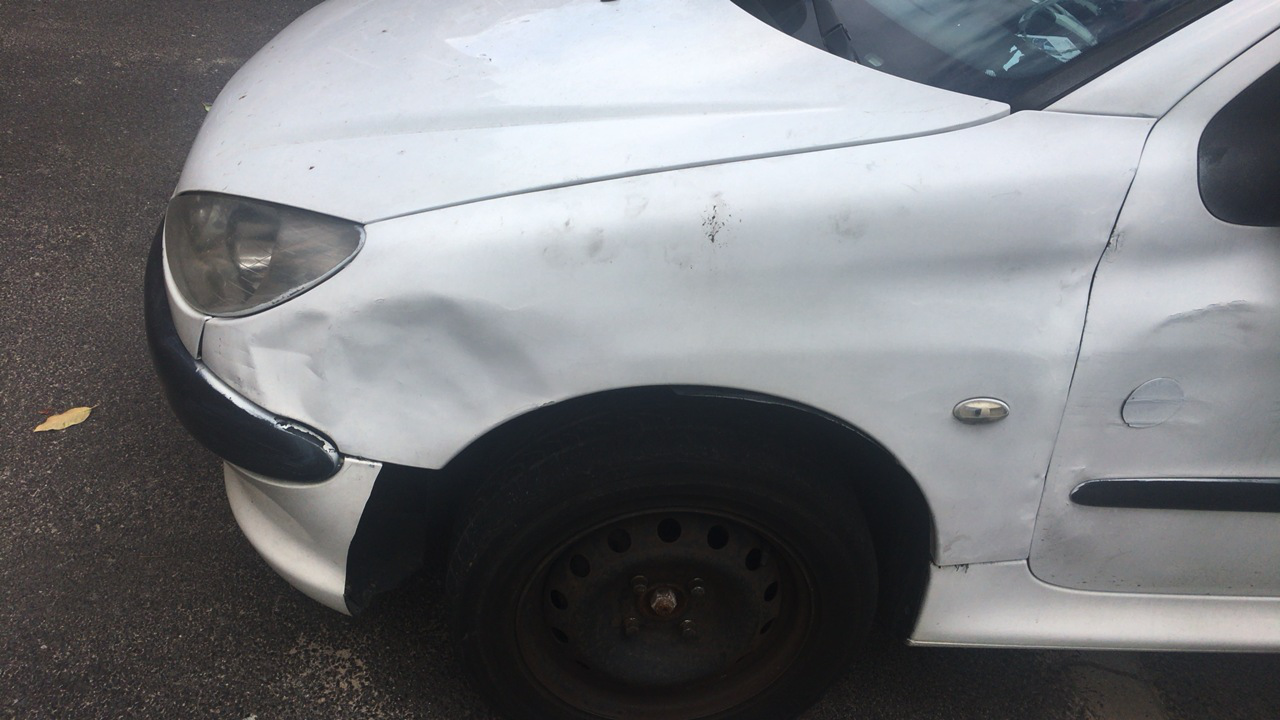

In [ ]:
img

Detecting Parts : 

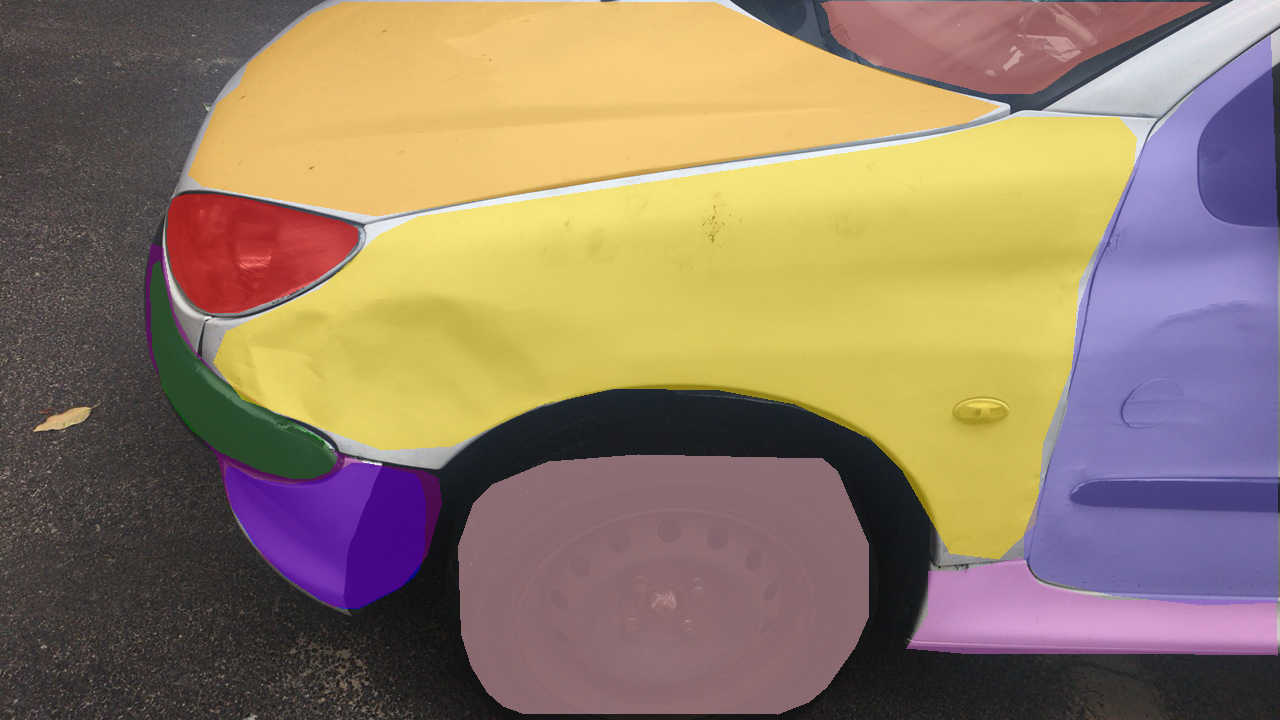

In [ ]:
for i,v in enumerate(boxes_parts):
  dim = v
  name = names_parts[i]
  poly_parts = []
  for j in dim:
    poly_parts.append(((j[0]*img.size[0])/100,(j[1]*img.size[1])/100))
  poly_parts.append(((dim[0][0]*img.size[0])/100,(dim[0][1]*img.size[1])/100))
  img2 = img.copy()
  draw = ImageDraw.Draw(img2)
  draw.polygon(poly_parts, fill = colors[i])
  img3 = Image.blend(img, img2, 0.5)
  img = img3
img

Detecting Damages : 

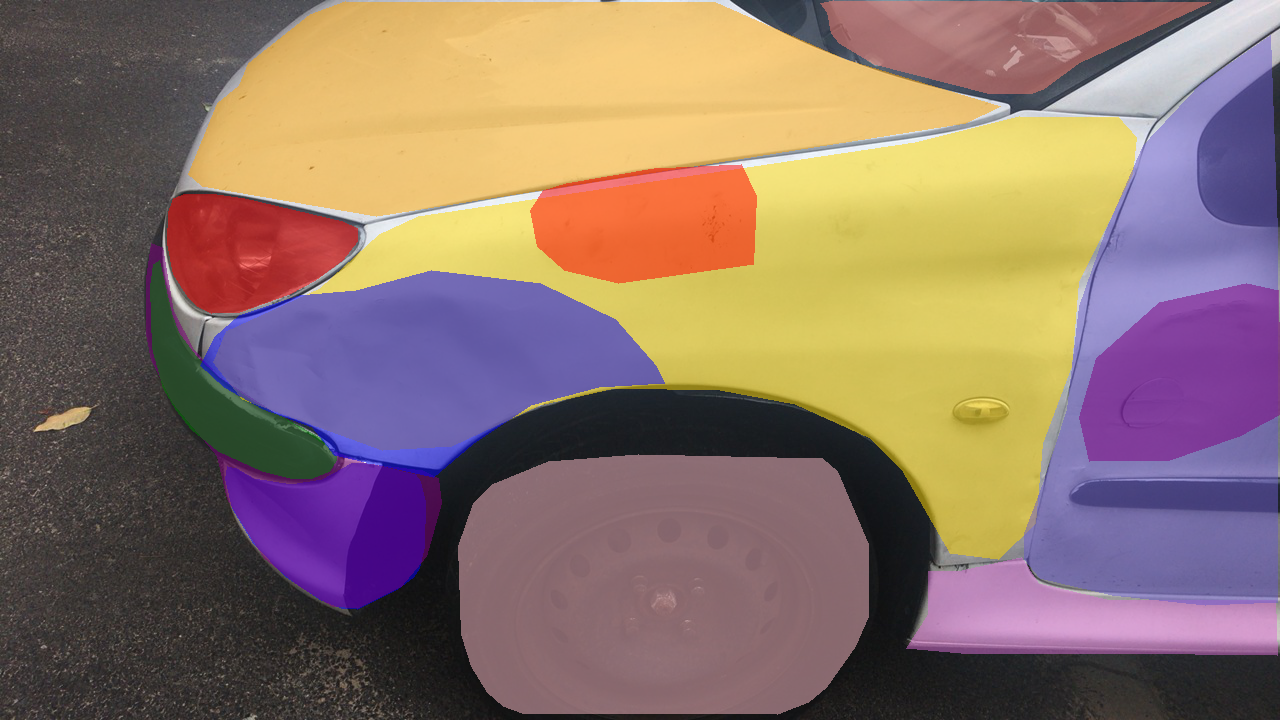

In [ ]:
#img = Image.open('/content/cloned-repo/Damage Identification/images/1.jpg').convert('RGBA')
for i,v in enumerate(boxes_damages):
  dim = v
  name = names_damages[i]
  poly_damages = []
  for j in dim:
    poly_damages.append(((j[0]*img.size[0])/100,(j[1]*img.size[1])/100))
  poly_damages.append(((dim[0][0]*img.size[0])/100,(dim[0][1]*img.size[1])/100))
  img2 = img.copy()
  draw = ImageDraw.Draw(img2)
  draw.polygon(poly_damages, fill = colors[i])
  img3 = Image.blend(img, img2, 0.5)
  img = img3
img

Detecting Parts And Making Boxes Around Them :

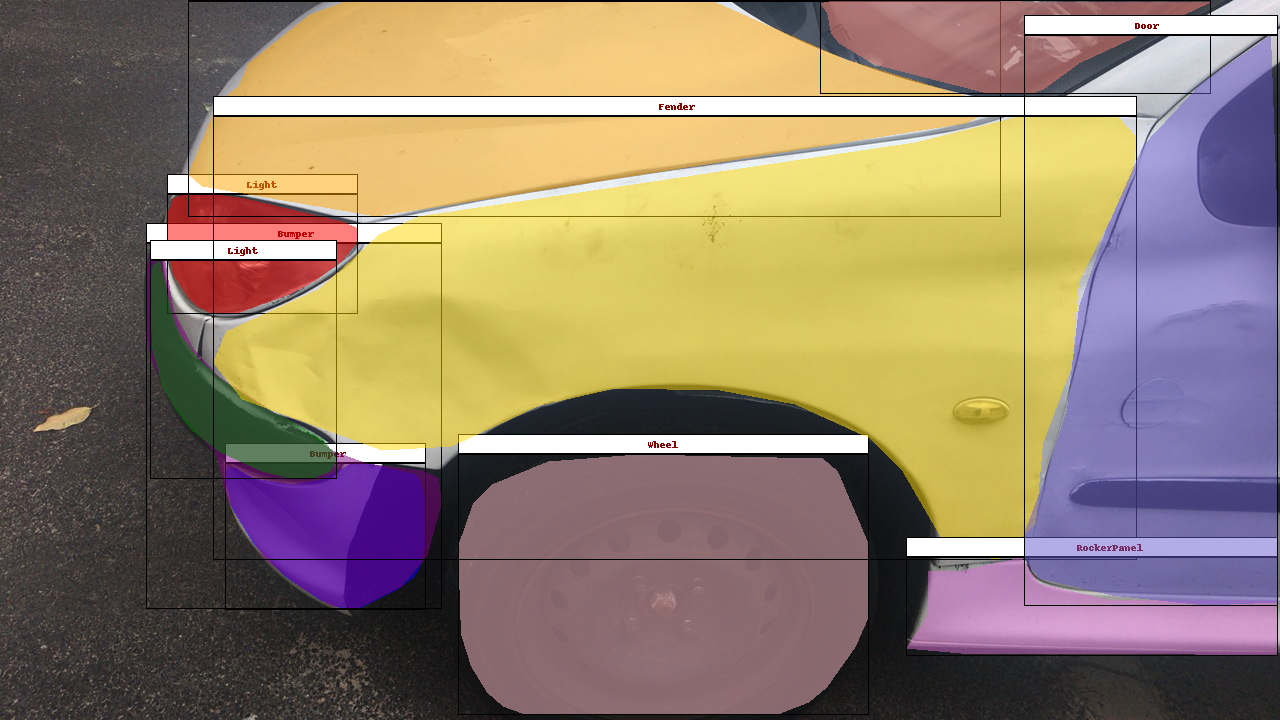

In [ ]:
img = Image.open('/content/cloned-repo/Damage Identification/images/2.jpg').convert('RGBA')
for i,v in enumerate(boxes_parts):
  dim = v
  name = names_parts[i]
  poly_parts = []
  for j in dim:
    poly_parts.append(((j[0]*img.size[0])/100,(j[1]*img.size[1])/100))
  poly_parts.append(((dim[0][0]*img.size[0])/100,(dim[0][1]*img.size[1])/100))
  img2 = img.copy()
  draw = ImageDraw.Draw(img2)
  draw.polygon(poly_parts, fill = colors[i])
  img3 = Image.blend(img, img2, 0.5)
  #d = ImageDraw.Draw(img3)
  #d.multiline_text((np.mean(poly_parts,axis=0)[0],np.mean(poly_parts,axis=0)[1]), str(names_parts[i]), fill=(0, 0,0))
  xmin = np.min(poly_parts,axis = 0)[0]
  ymin = np.min(poly_parts,axis = 0)[1]
  xmax = np.max(poly_parts,axis = 0)[0]
  ymax = np.max(poly_parts,axis = 0)[1]
  thickness = 4
  #im_width, im_height = img3.size
  #(left, right, top, bottom) = (xmin * im_width, xmax * im_width,ymin * im_height, ymax * im_height)
  #(left, right, top, bottom) = ((50,100,50,92))
  #draw.line([(left, top), (left, bottom), (right, bottom), (right, top),(left, top)],width=thickness,fill="black")
  #img1 = ImageDraw.Draw(img3)  
  #img1.line([(40, 40), (90,90),(120,120)], fill ="black", width = 0)
  #img3.show()
  img1 = ImageDraw.Draw(img3)  
  img1.rectangle([(xmin,ymin),(xmax,ymax)], outline ="black")
  #img1.rectangle([(xmin,ymin-1),(xmax,ymin-20)],fill = "white",outline ="black")
  #img1.multiline_text((np.mean(np.array([xmin,xmax])-52),ymin-15), str(names_parts[i][0]), fill=(128, 0,0))

  #d = ImageDraw.Draw(img1)
  if xmax-xmin < 6*len(str(names_parts[i][0])):
    img1.rectangle([(xmin-3*len(str(names_parts[i][0])),ymin-1),(xmax+3*len(str(names_parts[i][0])),ymin-20)],fill = "white",outline ="black")
    img1.multiline_text((np.mean(np.array([(xmin-3*len(str(names_parts[i][0]))),(xmax+3*len(str(names_parts[i][0])))])-15),ymin-15), str(names_parts[i][0]), fill=(128, 0,0))
  else:
    img1.rectangle([(xmin,ymin-1),(xmax,ymin-20)],fill = "white",outline ="black")
    img1.multiline_text((np.mean(np.array([xmin,xmax])-15),ymin-15), str(names_parts[i][0]), fill=(128, 0,0))
  #img.show()
  
  img = img3

img3.save('/tmp/out.png')
img3

Detecting Damages and Making Boxes Around Them : 

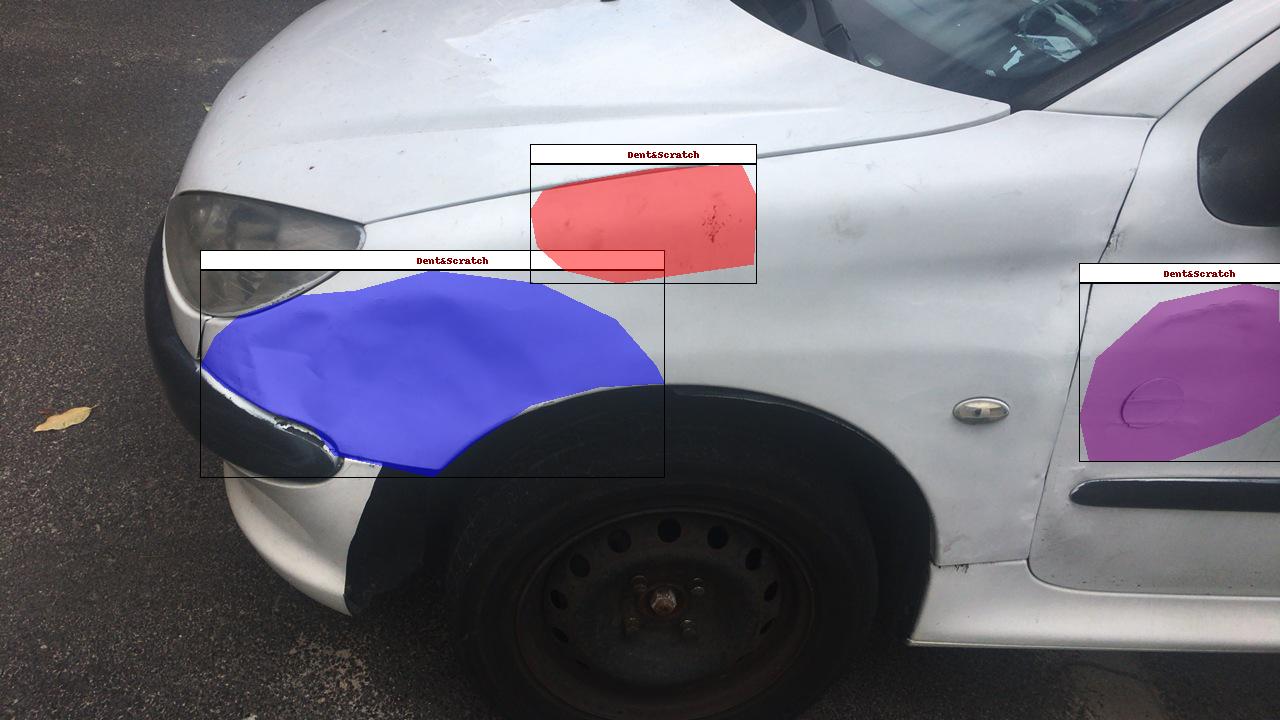

In [ ]:
img = Image.open('/content/cloned-repo/Damage Identification/images/2.jpg').convert('RGBA')
for i,v in enumerate(boxes_damages):
  dim = v
  name = names_damages[i]
  poly_damages = []
  for j in dim:
    poly_damages.append(((j[0]*img.size[0])/100,(j[1]*img.size[1])/100))
  poly_damages.append(((dim[0][0]*img.size[0])/100,(dim[0][1]*img.size[1])/100))
  img2 = img.copy()
  draw = ImageDraw.Draw(img2)
  draw.polygon(poly_damages, fill = colors[i])
  img3 = Image.blend(img, img2, 0.5)
  #d = ImageDraw.Draw(img3)
  #d.multiline_text((np.mean(poly_damages,axis=0)[0],np.mean(poly_damages,axis=0)[1]), str(names_damages[i]), fill=(0, 0,0))
  xmin = np.min(poly_damages,axis = 0)[0]
  ymin = np.min(poly_damages,axis = 0)[1]
  xmax = np.max(poly_damages,axis = 0)[0]
  ymax = np.max(poly_damages,axis = 0)[1]
  thickness = 4
  #im_width, im_height = img3.size
  #(left, right, top, bottom) = (xmin * im_width, xmax * im_width,ymin * im_height, ymax * im_height)
  #(left, right, top, bottom) = ((50,100,50,92))
  #draw.line([(left, top), (left, bottom), (right, bottom), (right, top),(left, top)],width=thickness,fill="black")
  #img1 = ImageDraw.Draw(img3)  
  #img1.line([(40, 40), (90,90),(120,120)], fill ="black", width = 0)
  #img3.show()
  img1 = ImageDraw.Draw(img3)  
  img1.rectangle([(xmin,ymin),(xmax,ymax)], outline ="black")
  #img1.rectangle([(xmin,ymin-1),(xmax,ymin-20)],fill = "white",outline ="black")
  #img1.multiline_text((np.mean(np.array([xmin,xmax])-52),ymin-15), str(names_damages[i][0]), fill=(128, 0,0))

  #d = ImageDraw.Draw(img1)
  if xmax-xmin < 6*len(str(names_damages[i][0])):
    img1.rectangle([(xmin-3*len(str(names_damages[i][0])),ymin-1),(xmax+3*len(str(names_damages[i][0])),ymin-20)],fill = "white",outline ="black")
    img1.multiline_text((np.mean(np.array([(xmin-3*len(str(names_damages[i][0]))),(xmax+3*len(str(names_damages[i][0])))])-15),ymin-15), str(names_damages[i][0]), fill=(128, 0,0))
  else:
    img1.rectangle([(xmin,ymin-1),(xmax,ymin-20)],fill = "white",outline ="black")
    img1.multiline_text((np.mean(np.array([xmin,xmax])-15),ymin-15), str(names_damages[i][0]), fill=(128, 0,0))
  #img.show()
  
  img = img3

img3.save('/tmp/out.png')
img3